In [1]:
import pandas as pd
import numpy as np


In [3]:
df=pd.read_csv('D:\dataset\\IRIS.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [15]:
df.species

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: species, Length: 150, dtype: object

In [6]:
df.species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [8]:
df.species[50:60]

50    Iris-versicolor
51    Iris-versicolor
52    Iris-versicolor
53    Iris-versicolor
54    Iris-versicolor
55    Iris-versicolor
56    Iris-versicolor
57    Iris-versicolor
58    Iris-versicolor
59    Iris-versicolor
Name: species, dtype: object

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [11]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
species=df.species.unique()

In [12]:
species

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [13]:
encoded_species = label_encoder.fit_transform(species)

In [14]:
encoded_species

array([0, 1, 2])

In [19]:
df['species_encoded'] = label_encoder.fit_transform(df.species)

In [20]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_encoded
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


In [23]:
df.species_encoded.unique()

array([0, 1, 2])

In [32]:
X=df.drop(['species','species_encoded'],axis='columns')
Y=df.species_encoded

In [33]:
X.head(3)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [34]:
Y.head(3)

0    0
1    0
2    0
Name: species_encoded, dtype: int32

## WE WILL USE Logistic regression algo

In [69]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)


In [70]:
len(y_train)

120

In [71]:
len(y_test)

30

In [103]:
from sklearn.linear_model import LogisticRegression
LG= LogisticRegression()

In [104]:
LG.fit(x_train,y_train)

LogisticRegression()

In [105]:
LG.predict(x_test)

array([2, 1, 2, 2, 2, 2, 1, 0, 0, 0, 1, 2, 0, 1, 0, 2, 1, 1, 2, 2, 0, 0,
       1, 2, 0, 1, 0, 1, 1, 0])

In [106]:
LG.score(x_test,y_test)

0.9

In [115]:
LG.predict([[4.1,3.4,5.6,6.6]])

C:\Users\Aslam Computer\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([2])

In [107]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_predicted)
cm

array([[10,  0,  0],
       [ 0,  8,  1],
       [ 0,  1, 10]], dtype=int64)

In [113]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: >

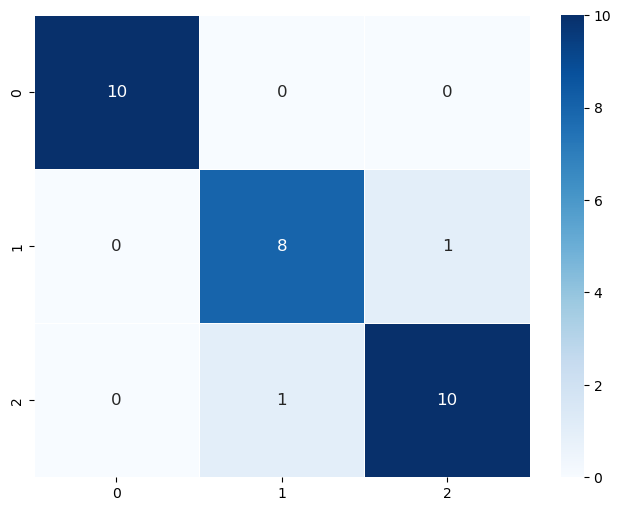

In [114]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", linewidths=0.5, annot_kws={"size": 12})

In [96]:
# we can also use KNN algo because this is the LOW-Dimension data

In [98]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

In [99]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [100]:
knn.predict(x_test)

array([2, 1, 2, 2, 2, 2, 1, 0, 0, 0, 1, 2, 0, 1, 0, 2, 2, 1, 2, 2, 0, 0,
       1, 2, 0, 1, 0, 1, 1, 0])

In [101]:
knn.score(x_test,y_test)

0.9333333333333333

In [112]:
knn.predict([[4.1,3.4,5.6,6.6]])

C:\Users\Aslam Computer\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([2])